In [52]:
import pandas as pd
import numpy as np

## pre-processing the data:
from sklearn.preprocessing import MinMaxScaler

## NN tools we need:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

##in order to perform the visualization tasks:
import matplotlib.pyplot  as plt

##our own module for data_preparation:
import glob
from info_extraction import df_family

##grid search cv
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

## error metrics:
from sklearn.metrics import mean_squared_error

In [2]:
## more readable format to the numbers than scientific notation:
np.set_printoptions(suppress=True)

In [3]:
#we import our training data:
xTrain = pd.read_pickle("xTrain_f2.pkl")
yTrain = pd.read_pickle("yTrainf_2.pkl")

In [4]:
xTrain

,seasonability_circ_cos,seasonability_circ_sin,time
0,0.991445,1.305262e-01,2015.000000
1,0.965926,2.588190e-01,2015.020833
2,0.923880,3.826834e-01,2015.041667
3,0.866025,5.000000e-01,2015.062500
4,0.793353,6.087614e-01,2015.083333
...,...,...,...
187,0.866025,-5.000000e-01,2018.895833
188,0.923880,-3.826834e-01,2018.916667
189,0.965926,-2.588190e-01,2018.937500
190,0.991445,-1.305262e-01,2018.958333


In [5]:
#we check our dims:
xTrain.shape

(192, 3)

In [6]:
yTrain.shape

(192, 1)

In [7]:
#Preprocessing the data: 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_target = scaler.fit_transform(yTrain['target'].values.reshape(-1,1))

In [8]:
scaled_target.shape

(192, 1)

In [9]:
#we should scale our features as well: 
scaled_features = scaler.fit_transform(xTrain)

In [10]:
scaled_features.shape

(192, 3)

In [11]:
scaled_features = scaled_features.reshape(192,3,1)

In [12]:
## would be recommendable to proceed with a grid search crossvalidation,
## let's do it with the number of neurons:
def create_model(neurons):
    input_shape = (3,1)

    ## we build the model:
    model = Sequential()

    model.add(LSTM(units = neurons, return_sequences = True, input_shape = input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(units = neurons, return_sequences = True))
    model.add(Dropout(0.2))
    model.add(LSTM(units = neurons))
    model.add(Dropout(0.2))
    model.add(Dense(units = 1, activation = 'relu'))
    
    ## we choose adam algorithm:
    model.compile(optimizer='adam', loss = 'mean_squared_error')
    return model

## our seed:
seed = 1
np.random.seed(seed)

## we compile our model and we fit our model for any number of neurons:
model = KerasRegressor(build_fn= create_model,epochs=100)

## reasonable examples of neurons, our cv is 1 because we have few data
# define the grid search parameters
neurons = [1, 5, 10, 15, 20, 25, 30]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=2)
grid_result = grid.fit(X=scaled_features, y=scaled_target)



# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0487
Epoch 2/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0487
Epoch 3/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0487
Epoch 4/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0487
Epoch 5/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0487
Epoch 6/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0487
Epoch 7/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0487
Epoch 8/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0487
Epoch 9/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0487
Epoch 10/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0487
Epoch 11/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0487
Epoch 12/100
6/6 [==============================] - 0s 12ms/step - loss: 0.0487
Epoch 13/100
6/6 [==============================] - 0s 8ms/

In [13]:
a = create_model(5)

In [14]:
input_shape = (3,1)

## we build the model:
model = Sequential()

model.add(LSTM(units = 5, return_sequences = True, input_shape = input_shape))
model.add(Dropout(0.2))
model.add(LSTM(units = 5, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 5))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

In [15]:
## we compile our model and we fit our model:

model.compile(optimizer='adam', loss = 'mean_squared_error')
history = model.fit(x=scaled_features,y=scaled_target,epochs=100, validation_split=0.1)

Epoch 1/100
6/6 [==============================] - 3s 444ms/step - loss: 0.0421 - val_loss: 0.0579
Epoch 2/100
6/6 [==============================] - 0s 15ms/step - loss: 0.0375 - val_loss: 0.0535
Epoch 3/100
6/6 [==============================] - 0s 16ms/step - loss: 0.0331 - val_loss: 0.0500
Epoch 4/100
6/6 [==============================] - 0s 15ms/step - loss: 0.0313 - val_loss: 0.0475
Epoch 5/100
6/6 [==============================] - 0s 15ms/step - loss: 0.0287 - val_loss: 0.0460
Epoch 6/100
6/6 [==============================] - 0s 15ms/step - loss: 0.0271 - val_loss: 0.0452
Epoch 7/100
6/6 [==============================] - 0s 15ms/step - loss: 0.0262 - val_loss: 0.0449
Epoch 8/100
6/6 [==============================] - 0s 14ms/step - loss: 0.0279 - val_loss: 0.0449
Epoch 9/100
6/6 [==============================] - 0s 15ms/step - loss: 0.0285 - val_loss: 0.0448
Epoch 10/100
6/6 [==============================] - 0s 15ms/step - loss: 0.0261 - val_loss: 0.0447
Epoch 11/100
6/6 [

Epoch 84/100
6/6 [==============================] - 0s 13ms/step - loss: 0.0263 - val_loss: 0.0435
Epoch 85/100
6/6 [==============================] - 0s 14ms/step - loss: 0.0255 - val_loss: 0.0435
Epoch 86/100
6/6 [==============================] - 0s 14ms/step - loss: 0.0256 - val_loss: 0.0435
Epoch 87/100
6/6 [==============================] - 0s 13ms/step - loss: 0.0259 - val_loss: 0.0434
Epoch 88/100
6/6 [==============================] - 0s 13ms/step - loss: 0.0264 - val_loss: 0.0434
Epoch 89/100
6/6 [==============================] - 0s 13ms/step - loss: 0.0257 - val_loss: 0.0435
Epoch 90/100
6/6 [==============================] - 0s 13ms/step - loss: 0.0256 - val_loss: 0.0435
Epoch 91/100
6/6 [==============================] - 0s 13ms/step - loss: 0.0260 - val_loss: 0.0435
Epoch 92/100
6/6 [==============================] - 0s 13ms/step - loss: 0.0255 - val_loss: 0.0435
Epoch 93/100
6/6 [==============================] - 0s 13ms/step - loss: 0.0264 - val_loss: 0.0435
Epoch 94/1

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 3, 5)              140       
_________________________________________________________________
dropout_6 (Dropout)          (None, 3, 5)              0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 3, 5)              220       
_________________________________________________________________
dropout_7 (Dropout)          (None, 3, 5)              0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 5)                 220       
_________________________________________________________________
dropout_8 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [17]:
## the last year will be our test sample:
tablas20_5 = glob.glob("C:/Users/Javier/Documents/GIT/Repositories/TFM-Textil-Santanderina/data/raw/2019*.xlsx")
tablas20_all = list([tablas20_5])

In [18]:
yTest, xTest = df_family(product_family= 2,list_directories=tablas20_all)

In [19]:

scaled_target_test = scaler.fit_transform(yTest['target'].values.reshape(-1,1))

In [20]:
scaled_features_test = scaler.fit_transform(xTest)

In [21]:
scaler.fit(yTest)

MinMaxScaler()

In [22]:
num_test = len(scaled_features_test)
scaled_features_test = scaled_features_test.reshape(num_test,3,1)

In [23]:
y_output = model.predict(scaled_features_test)

In [24]:
y_output.shape

(48, 1)

In [25]:
y_predicted = scaler.inverse_transform(y_output)

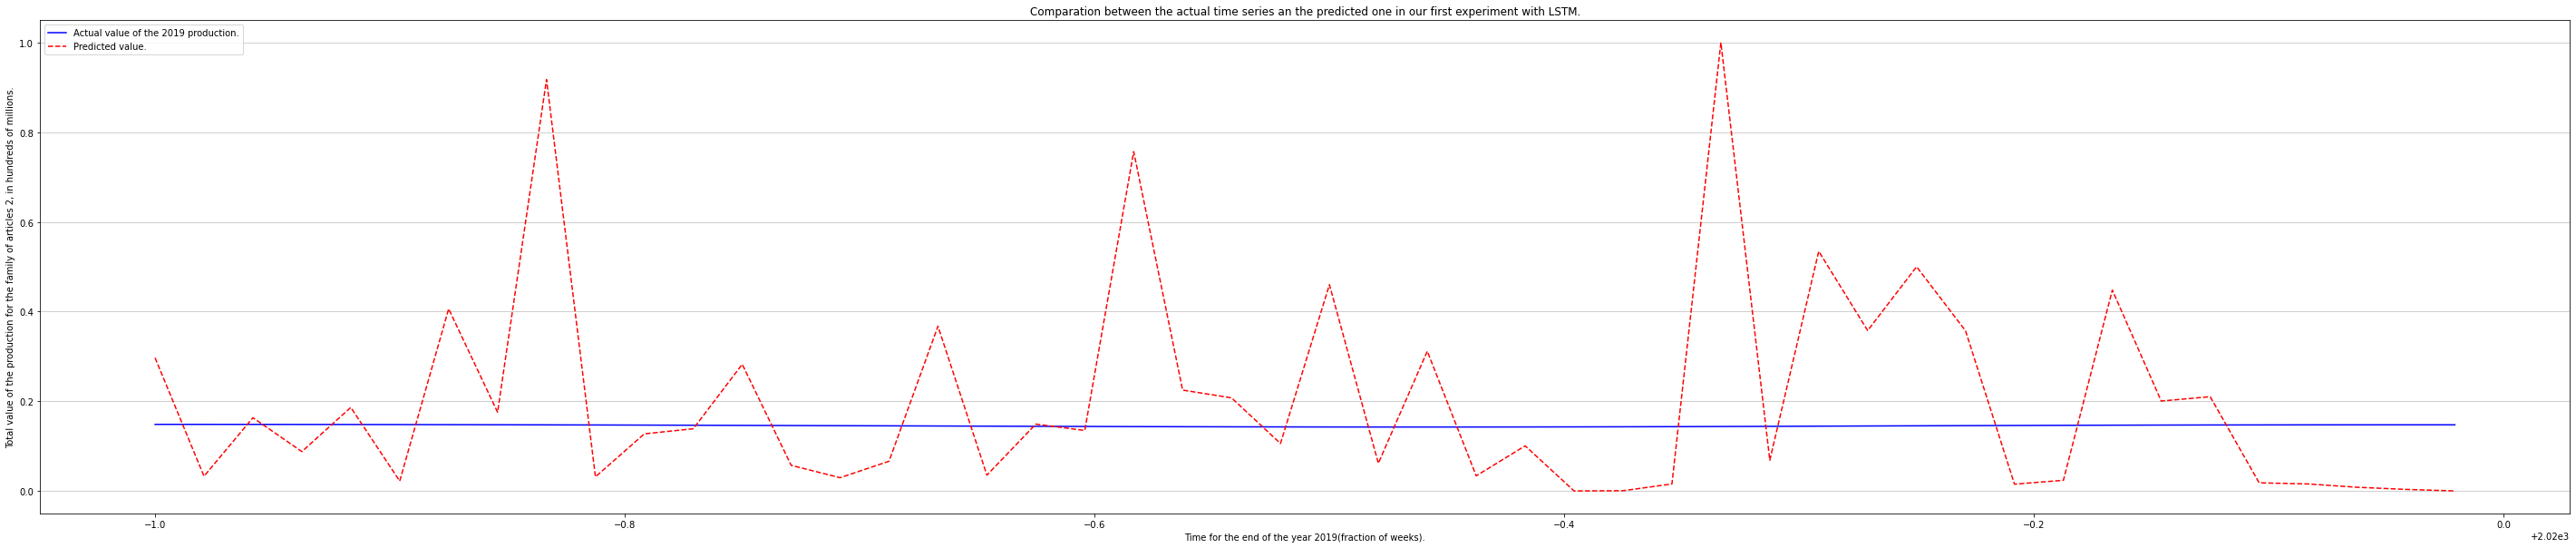

In [64]:
from pylab import rcParams
ax = plt.figure().add_subplot(111)
ax.plot(xTest.time,y_output,'-b', label = 'Actual value of the 2019 production.')
ax.plot(xTest.time,scaled_target_test, '--r', label = 'Predicted value.')
ax. legend(loc='upper left')
plt.title('Comparation between the actual time series an the predicted one in our first experiment with LSTM.')
plt.xlabel('Time for the end of the year 2019(fraction of weeks).')
plt.ylabel('Total value of the production for the family of articles 2, in hundreds of millions.')

plt.grid(axis='y', alpha=0.75)

rcParams['figure.figsize'] = 50, 10

In [31]:
y_output

array([[0.14844546],
       [0.14843296],
       [0.14837985],
       [0.148289  ],
       [0.14816321],
       [0.14800514],
       [0.14781727],
       [0.14760184],
       [0.14736104],
       [0.14709687],
       [0.14681141],
       [0.14650692],
       [0.1461859 ],
       [0.14585125],
       [0.14550634],
       [0.14515509],
       [0.14480197],
       [0.14445214],
       [0.1441113 ],
       [0.14378573],
       [0.14348221],
       [0.14320785],
       [0.14296997],
       [0.14277579],
       [0.14263214],
       [0.14254506],
       [0.14251933],
       [0.14255808],
       [0.1426624 ],
       [0.14283097],
       [0.14306004],
       [0.14334334],
       [0.14367245],
       [0.14403708],
       [0.14442575],
       [0.14482632],
       [0.14522684],
       [0.14561592],
       [0.14598346],
       [0.14632086],
       [0.14662138],
       [0.14688002],
       [0.14709371],
       [0.14726096],
       [0.14738177],
       [0.14745739],
       [0.14749004],
       [0.147

In [30]:
scaled_target_test

array([[0.296924  ],
       [0.03278346],
       [0.16325091],
       [0.08773707],
       [0.18624317],
       [0.02204266],
       [0.4061706 ],
       [0.17545549],
       [0.91744369],
       [0.03137784],
       [0.12732266],
       [0.13865885],
       [0.2824978 ],
       [0.05706139],
       [0.02951603],
       [0.0662299 ],
       [0.36731913],
       [0.03523403],
       [0.14905691],
       [0.13484756],
       [0.75677041],
       [0.2249195 ],
       [0.20753617],
       [0.10580952],
       [0.46001991],
       [0.0616234 ],
       [0.31161478],
       [0.03365923],
       [0.10050701],
       [0.        ],
       [0.00045144],
       [0.01555596],
       [1.        ],
       [0.0683436 ],
       [0.53445554],
       [0.35768438],
       [0.5000007 ],
       [0.35718061],
       [0.01510549],
       [0.02366015],
       [0.44785546],
       [0.2004569 ],
       [0.2101918 ],
       [0.01811937],
       [0.01554232],
       [0.00819193],
       [0.00341554],
       [0.000

In [53]:
## very high error:
mean_squared_error(yTest.target, y_predicted)

8788040727360341.0

In [36]:
## we store our generated datasets for test:
xTest.to_pickle("xTest_f2")
yTest.to_pickle("yTest_f2")